## 1. 지지도, 신뢰도, 향상도
- 1. '빼빼로'와 '딴짓초코'가 함께 팔린 거래의 지지도를 계산하세요.
- 2. '빼빼로'가 팔린 거래 중에서 '빼빼로'와 '오징어칩'이 함께 팔린 거래의 신뢰도를 계산하세요.
- 3. '빼빼로'와 '양조위빵'의 향상도를 계산하세요.

<br>

- 지지도(A,B): A와 B가 함께 팔린 거래 횟수 / 전체 거래 횟수
- 신뢰도(A->B): A와 B가 함께 팔린 거래 횟수 / A가 팔린 거래 횟수
- 향상도(A,B): 신뢰도(A->B) / 지지도(B)

In [1]:
import pandas as pd
# 데이터
df = pd.DataFrame({
    'transaction': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '빼빼로': [1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
    '딴짓초코': [0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
    '양조위빵': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
    '오징어칩': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
    '초코파이': [1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
})

df

,transaction,빼빼로,딴짓초코,양조위빵,오징어칩,초코파이
0,1,1,0,1,0,1
1,2,0,1,0,1,1
2,3,1,1,0,1,0
3,4,1,0,1,0,0
4,5,0,1,1,0,1
5,6,1,0,1,1,0
6,7,1,1,0,0,1
7,8,0,1,0,1,1
8,9,1,0,1,1,0
9,10,1,0,0,1,0


In [47]:
# 1. '빼빼로'와 '딴짓초코'가 함께 팔린 거래의 지지도

# 전체 거래수
total = len(df)
print(total)

# 빼빼로와 딴짓초고가 함께 팔린 거래수
intersaction = len(df[(df['빼빼로']==1)&(df['딴짓초코']==1)])
print(intersaction)

print(intersaction/total)

10
2
0.2


In [49]:
# 2. '빼빼로'가 팔린 거래 중에서 '빼빼로'와 '오징어칩'이 함께 팔린 거래의 신뢰도를 계산하세요.

# 신뢰도 = p(A n B) / P(A)

# 빼빼로 거래
pepero = sum(df['빼빼로'])
print(pepero)

# 빼빼로 오징어칩 거래
intersaction = len(df[(df['빼빼로']==1) & (df['오징어칩']==1)])

print(intersaction/pepero)

7
0.5714285714285714


In [56]:
# 3. '빼빼로'와 '양조위빵'의 향상도를 계산하세요.

# 향상도 =  신뢰도(A, B)/지지도(B)

# 빼빼로 거래
pepero = sum(df['빼빼로'])
print(pepero)

# 양조위빵
bread = sum(df['양조위빵'])
print(bread)

# 빼빼로 양조위빵 거래
intersaction = len(df[(df['빼빼로']==1) & (df['양조위빵']==1)])
print(intersaction)

print((intersaction*total)/(pepero*bread))

7
5
4
1.1428571428571428


In [55]:
print((intersaction/pepero)/(bread/total))

1.1428571428571428


<br><br>

## 2. 포아송분포
### 문제: 한 서점에서는 평균적으로 하루에 3명의 고객이 특정 잡지를 구매합니다. 이 데이터는 포아송 분포를 따른다고 가정할 때, 다음 질문에 대한 답을 구하세요.

#### - 하루에 정확히 5명의 고객이 잡지를 구매할 확률은 얼마입니까? (%로 값을 정수로 입력하시오)
#### - 하루에 적어도 2명의 고객이 잡지를 구매할 확률은 얼마입니까? (%로 값을 정수로 입력하시오)

- 포아송 분포의 확률 질량 함수(PMF)
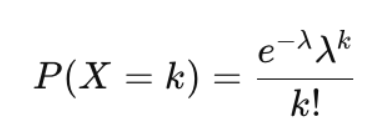

- λ는 단위 시간(또는 단위 공간)당 평균 발생 횟수이고, k는 특정 시간(또는 공간) 동안의 이벤트 발생 횟수입니다.

In [57]:
from scipy.stats import poisson
help(poisson)

Help on poisson_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.poisson_gen object>
    A Poisson discrete random variable.
    
    As an instance of the `rv_discrete` class, `poisson` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(mu, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, mu, loc=0)
        Probability mass function.
    logpmf(k, mu, loc=0)
        Log of the probability mass function.
    cdf(k, mu, loc=0)
        Cumulative distribution function.
    logcdf(k, mu, loc=0)
        Log of the cumulative distribution function.
    sf(k, mu, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, mu, loc=0)
        Log of the survival function.
    ppf(q, mu, loc=0)
        Percent point function (inverse of ``cd

In [67]:
# 하루에 정확히 5명의 고객이 잡지를 구매할 확률
lambda_ = 3

print(round(poisson.pmf(5, lambda_), 2)*100)

# 하루에 적어도 2명의 고객이 잡지를 구매할 확률
print(round(1-poisson.pmf(1, lambda_), 2)*100)

10.0
85.0


<br><br>

## 3. 독립성 검정(카이제곱 검정)
### 성별과 시험합격은 독립적인가를 검정하시오!
- 1 검정 통계량?
- 2 p-value?
- 3 귀무가설 기준 (기각/채택)?
- 4 남자의 합격 기대 빈도?
<br>

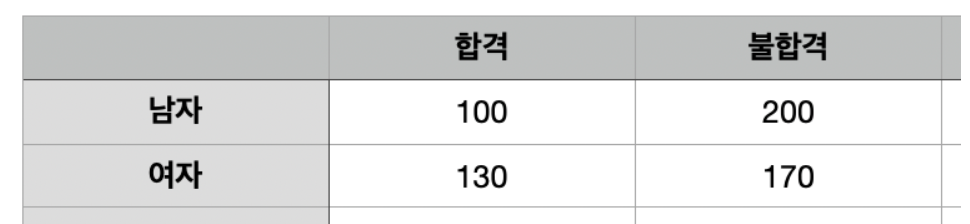

In [69]:
import pandas as pd

gender = ['남자', '여자']
df = pd.DataFrame({'합격':[100, 130], '불합격':[200, 170]}, index=gender)
df

,합격,불합격
남자,100,200
여자,130,170


In [74]:
from scipy.stats import chi2_contingency

st, p_val, dof, exp = chi2_contingency(df)
print(st)
print(p_val)

if p_val < 0.05:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')
print(exp[0][0])

5.929494712103407
0.01488951060599475
귀무가설 기각
115.0
